# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_cloudiness = []
city_wind = []
city_country = []
city_date = []


for x in cities:
    
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={x}&units=imperial&appid={weather_api_key}"
        response = requests.get(url).json()
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_cloudiness.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
    except (KeyError):
        pass
    
    

In [16]:
from pandas import DataFrame

raw_list =  {"City":city_name,
             "Latitude":city_lat,
             "Longitude":city_lng,
             "Max Temp":city_max_temp,
             "Humidity":city_humidity,
             "Cloudiness":city_cloudiness,
             "Wind Speed":city_wind,
             "Country":city_country,
             "Date":city_date}

In [17]:
raw_df = pd.DataFrame(raw_list)

In [18]:
raw_df.to_csv("raw_api.csv",index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
import csv

csv_file = "raw_api.csv"

df = pd.read_csv(csv_file)

In [3]:
df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,North Bend,43.41,-124.22,59.00,82,1,8.05,US,1603246000
1,Mattawa,46.74,-119.90,57.20,76,40,5.82,US,1603246149
2,Kaitangata,-46.28,169.85,56.82,47,57,2.66,NZ,1603246149
3,Cherskiy,68.75,161.30,23.02,97,97,4.41,RU,1603246149
4,Saskylakh,71.92,114.08,19.78,97,91,8.52,RU,1603246150


In [4]:
df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,20.878936,20.832183,59.984844,73.394495,51.299083,7.590147,1.603246e+09
std,32.936157,89.857913,20.028415,20.995893,40.630198,4.961324,8.670356e+01
min,-54.800000,-179.170000,3.200000,10.000000,0.000000,0.360000,1.603246e+09
25%,-5.810000,-54.330000,44.600000,64.000000,2.000000,3.420000,1.603246e+09
50%,26.400000,26.140000,64.080000,79.000000,55.000000,6.710000,1.603246e+09
75%,48.110000,100.500000,76.780000,89.000000,92.000000,10.330000,1.603246e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,28.720000,1.603246e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
humidity_list = df["Humidity"]

humidity_list.max()

100

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

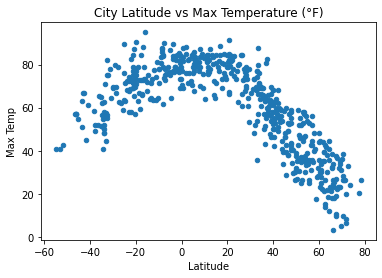

In [58]:
df.plot(kind="scatter",x="Latitude",y="Max Temp", title=("City Latitude vs Max Temperature (°F)"))

plt.savefig("weather_plots/testlat_temp.png")

In [ ]:
# This shows that the closer you are to 0 latitude, the hotter it can get. 
# Makes sense, seeing how the equator is known as the hottest part of the planet.
# This code was difficult since it did not default to imperial (F) units and I had to make a conversion in the previous for loop.

## Latitude vs. Humidity Plot

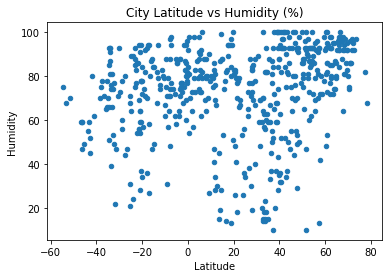

In [43]:
df.plot(kind="scatter",x="Latitude",y="Humidity", title=("City Latitude vs Humidity (%)"))

plt.savefig("weather_plots/lat_humid.png")

In [ ]:
# High up just like clouds, it seems like most of the data is on the upper right end of humidity %. Not much of a trend here.

## Latitude vs. Cloudiness Plot

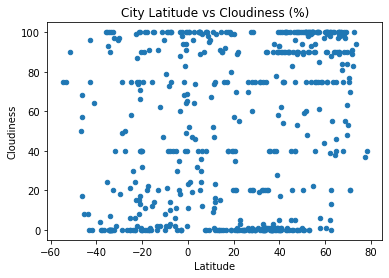

In [46]:
df.plot(kind="scatter",x="Latitude",y="Cloudiness", title=("City Latitude vs Cloudiness (%)"))

plt.savefig("weather_plots/lat_cloud.png")

In [ ]:
# The data suggests most places are either maximum cloudy, or have no clouds at all. 
# Maybe the middle samples are on their way to one side or the other.
# Honestly I dont really see a trend otherwise.

## Latitude vs. Wind Speed Plot

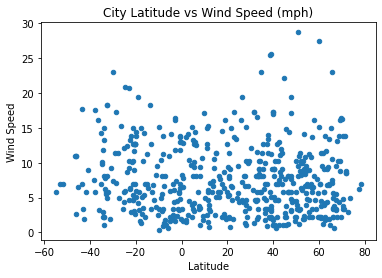

In [47]:
df.plot(kind="scatter",x="Latitude",y="Wind Speed", title=("City Latitude vs Wind Speed (mph)"))

plt.savefig("weather_plots/lat_wind.png")

In [ ]:
# Interestingly, the 0 latitude places never get winds above 20 mph, but the +- 40 places can get higher than that

## Linear Regression

In [29]:
north_df = df[df["Latitude"] >= 0]

south_df = df[df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

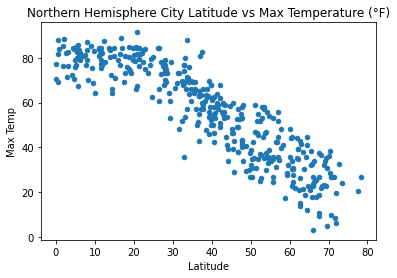

In [30]:
north_df.plot(kind="scatter",x="Latitude",y="Max Temp", title=("Northern Hemisphere City Latitude vs Max Temperature (°F)"))

In [ ]:
# I was just testing the code here.

The r-squared is: -0.891204093783499
The equation of the regression line is: y = -0.94x + 92.19


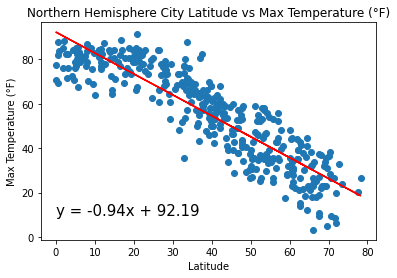

In [48]:
x_values = north_df["Latitude"]
y_values = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="black")
plt.title("Northern Hemisphere City Latitude vs Max Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("weather_plots/Nlat_temp.png")

In [ ]:
# This regression shows the correlation between distance away from the 0 point and a decrease in temp.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7147775561242679
The equation of the regression line is: y = 0.62x + 82.85


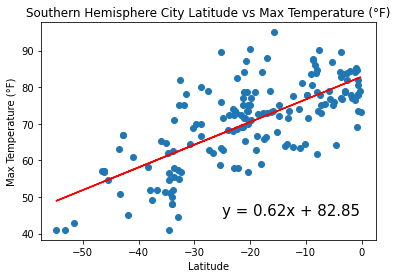

In [49]:
x_values = south_df["Latitude"]
y_values = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="black")
plt.title("Southern Hemisphere City Latitude vs Max Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("weather_plots/Slat_temp.png")

In [ ]:
# This is similar to the previous regression, but in the opposite direction.
# The closer you get to the 0 point, the hotter it gets.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2584695082825826
The equation of the regression line is: y = 0.29x + 63.05


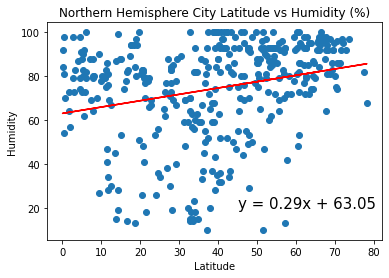

In [50]:
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="black")
plt.title("Northern Hemisphere City Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("weather_plots/Nlat_humid.png")

In [ ]:
# As I pointed out in the first humidity plot, the trend seems to point to the upper right end of this plot.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2501401602320103
The equation of the regression line is: y = 0.32x + 77.63


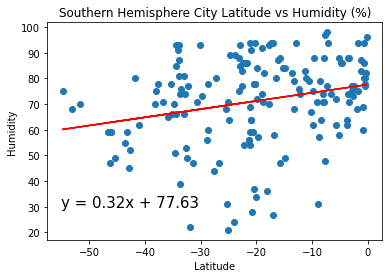

In [51]:
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="black")
plt.title("Southern Hemisphere City Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("weather_plots/Slat_humid.png")

In [ ]:
# The trend here is very similar to the northern hemisphere. 
# It seems the northern hemisphere and higher latitude means it will be more humid.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2796069970612776
The equation of the regression line is: y = 0.57x + 33.05


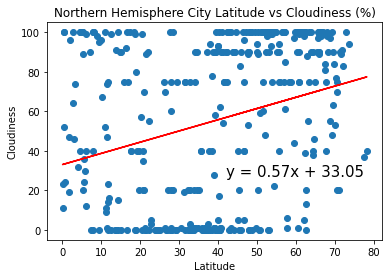

In [52]:
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,27),fontsize=15,color="black")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("weather_plots/Nlat_cloud.png")

In [ ]:
# To my suprise there is an upward trend, showing there are more clouds the farther from 0 latitude you get.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11258116072966029
The equation of the regression line is: y = 0.33x + 49.01


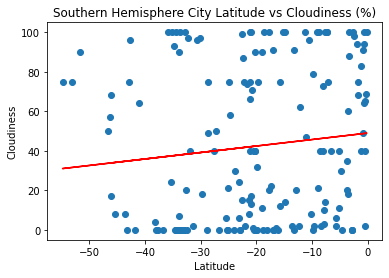

In [53]:
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,50),fontsize=15,color="black")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("weather_plots/Slat_cloud.png")

In [ ]:
# Oddly, the trend is upward here too, so southern hemisphere is the opposite compared to northern. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.007452528380599801
The equation of the regression line is: y = -0.0x + 7.49


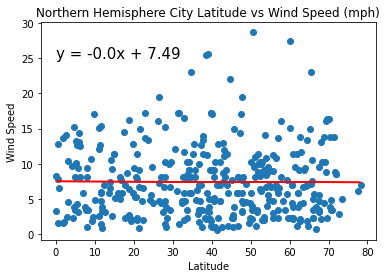

In [54]:
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="black")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("weather_plots/Nlat_wind.png")

In [ ]:
# I thought the trend would go more positve here but it is dead flat.
# I guess the high speeds are just outliers and really dont effect the linear regression all that much.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1389441328187686
The equation of the regression line is: y = -0.05x + 6.93


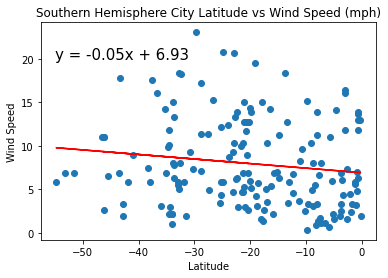

In [55]:
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="black")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig("weather_plots/Slat_wind.png")

In [ ]:
# the data is all over the place but appears to have a negative slope. It really isn't steep enough for any conclusions though. 